In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('final_games.csv')

In [8]:
df.shape

(140792, 32)

In [9]:
df.head(2)

,Game_ID,Rated,Variant,Speed,Created_At,Last_Move_At,Game_Status,Source,Winner,Opening_Name,...,Black_Inaccuracy,Black_Mistake,Black_Blunder,Black_ACPL,Clocks,Analysis,Total_Time_Init,Total_Time_Increment,Total_Time,Moves
0,PsevV6VH,True,standard,classical,2024-12-15T11:09:25.224000+00:00,2024-12-15T11:55:14.775000+00:00,resign,pool,white,English Opening: Symmetrical Variation,...,5,1,1,47,"[180003, 180003, 178499, 178019, 178339, 17757...","[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",1800,0,1800,Nf3 c5 c4 Nc6 Nc3 g6 e3 Bg7 d4 cxd4 exd4 d6 h3...
1,diLZa8sj,True,standard,classical,2024-10-28T13:54:16.605000+00:00,2024-10-28T14:32:21.403000+00:00,resign,pool,white,"French Defense: Winawer Variation, Advance Var...",...,4,0,1,31,"[180003, 180003, 179827, 179683, 178619, 17936...","[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",1800,0,1800,e4 e6 d4 d5 Nc3 Bb4 e5 Ne7 a3 Bxc3+ bxc3 b6 Bb...


In [10]:
columns_for_eda = df[[
    'Game_Status', 'Source', 'Winner',
    'Opening_PLY', 'White_Player', 'White_Title',
    'Black_Player', 'Black_Title'
]]


In [11]:
columns_for_eda

,Game_Status,Source,Winner,Opening_PLY,White_Player,White_Title,Black_Player,Black_Title
0,resign,pool,white,3.0,orenlivne,NaN,oyto_971179789,NaN
1,resign,pool,white,7.0,ludio_ludus,NaN,oyto_971179789,NaN
2,resign,pool,black,5.0,ribik,NaN,oyto_971179789,NaN
3,resign,pool,white,15.0,orel_chess13,NaN,oyto_971179789,NaN
4,draw,pool,NaN,3.0,jthain1,NaN,oyto_971179789,NaN
...,...,...,...,...,...,...,...,...
140787,outoftime,arena,black,5.0,sc1211,NaN,tuzakli_egitim,FM
140788,outoftime,arena,black,3.0,pro_in_atomic,NaN,tuzakli_egitim,FM
140789,outoftime,arena,white,1.0,tuzakli_egitim,FM,mel_pints123,NaN
140790,outoftime,arena,black,1.0,emirloyd,NaN,tuzakli_egitim,FM


Проверим типы данных

In [12]:
columns_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140792 entries, 0 to 140791
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Game_Status   140792 non-null  object 
 1   Source        140792 non-null  object 
 2   Winner        127103 non-null  object 
 3   Opening_PLY   139522 non-null  float64
 4   White_Player  140565 non-null  object 
 5   White_Title   46713 non-null   object 
 6   Black_Player  140481 non-null  object 
 7   Black_Title   46512 non-null   object 
dtypes: float64(1), object(7)
memory usage: 8.6+ MB


Проверка на наличие пропусков

In [13]:
columns_for_eda.isna().sum()

Game_Status         0
Source              0
Winner          13689
Opening_PLY      1270
White_Player      227
White_Title     94079
Black_Player      311
Black_Title     94280
dtype: int64

Замена пропусков на 'other' у категориальных признаков.

In [14]:
columns_to_fill = ['Winner', 'White_Player', 'White_Title', 'Black_Player', 'Black_Title']
columns_for_eda[columns_to_fill] = columns_for_eda[columns_to_fill].fillna('other')

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Замена пропусков на среднее у числовых признаков

In [15]:
# Вычисляем среднее значение, игнорируя NaN
mean_opening_ply = columns_for_eda['Opening_PLY'].mean()

# Заменяем пропуски на среднее значение
columns_for_eda['Opening_PLY'] = columns_for_eda['Opening_PLY'].fillna(mean_opening_ply)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# Проверка на пропуски после замены
columns_for_eda.isna().sum()

Game_Status     0
Source          0
Winner          0
Opening_PLY     0
White_Player    0
White_Title     0
Black_Player    0
Black_Title     0
dtype: int64

1. Анализ столбца 'Game_Status' - статус завершения партии (ничья, мат, чит и т.д.) 

In [17]:
# Подсчет частоты значений в столбце Game_Status
game_status_counts = columns_for_eda['Game_Status'].value_counts()

In [18]:
game_status_counts

resign       77423
outoftime    25236
mate         24736
draw         11705
stalemate      859
timeout        810
cheat           23
Name: Game_Status, dtype: int64

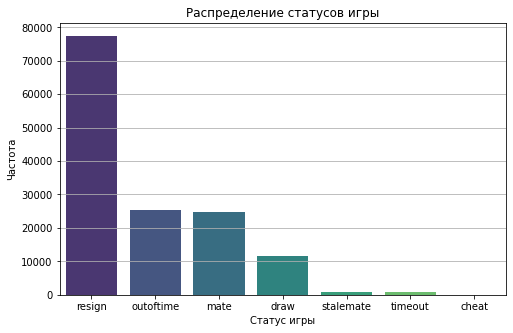

In [19]:
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x=game_status_counts.index, y=game_status_counts.values, palette='viridis')
plt.title('Распределение статусов игры')
plt.xlabel('Статус игры')
plt.ylabel('Частота')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

resign - (сдаться): игрок признает поражение и завершает партию.

outoftime - (время истекло): игрок не успел сделать ход до истечения времени на часах, что приводит к его поражению.

mate - (мат): партия заканчивается победой одного из игроков, когда король противника находится под шахом и не может избежать захвата.

draw - (ничья): партия заканчивается вничью по соглашению игроков или из-за других условий (пат, троекратное повторение и т.д.).

stalemate - (пат): партия заканчивается ничьей, когда один из игроков не может сделать законный ход, но его король не под шахом.

timeout - (время вышло): игрок не успел сделать ход, и его время истекло, что приводит к поражению.

cheat - (жульничество): один из игроков был пойман на использовании запрещенных методов (например, шахматного движка) во время игры.

2. Анализ столбца Source - источник партии (турнир, с другом, pool и т.д.)

In [20]:
# Подсчет частоты значений в столбце Source
source_counts = columns_for_eda['Source'].value_counts()

In [21]:
source_counts

pool        83031
lobby       25479
arena       18181
friend      10251
swiss        2145
simul        1170
position      258
ai            246
api            31
Name: Source, dtype: int64

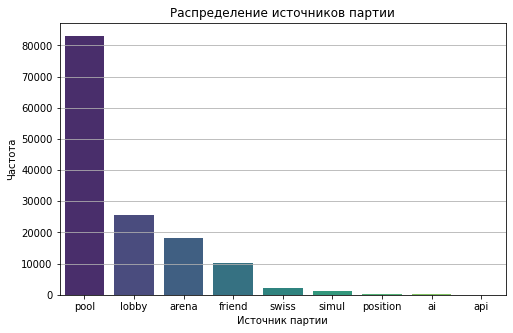

In [22]:
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Распределение источников партии')
plt.xlabel('Источник партии')
plt.ylabel('Частота')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

pool - игры из общего пула, где игроки могут автоматически подбираться друг к другу.

lobby - игры, сыгранные в неформальной обстановке, где игроки могут общаться и находить соперников.

arena - турнирный формат, где игроки соревнуются в ограниченное время, зарабатывая очки за победы.

friend - игры между друзьями, приглашенными на партию.

swiss - турнирный формат с несколькими раундами, где игроки играют с соперниками, имеющими схожие результаты.

simul - симультанные игры, где один игрок играет против нескольких соперников одновременно.

position - игры, сыгранные из определенной позиции для анализа или обучения.

ai - игры против искусственного интеллекта для тренировки и улучшения навыков.

api - игры, созданные или полученные через API, используемые для автоматизации или разработки приложений.

3. Анализ столбца Winner - победитель партии (White, Black или None в случае ничьей)

In [23]:
# Подсчет частоты значений в столбце Winner 
winner_counts = columns_for_eda['Winner'].value_counts()

In [24]:
winner_counts

white    66836
black    60267
other    13689
Name: Winner, dtype: int64

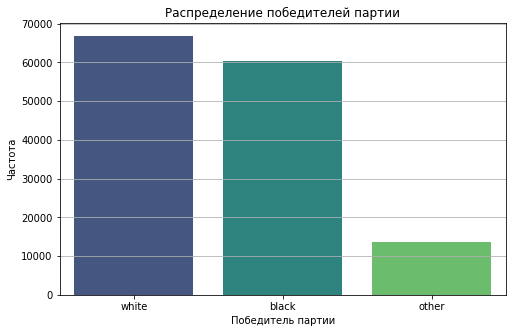

In [25]:
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='viridis')
plt.title('Распределение победителей партии')
plt.xlabel('Победитель партии')
plt.ylabel('Частота')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

4. Анализ столбца Opening_PLY - количество полуходов до выхода из дебютной стадии - числовой


In [26]:
columns_for_eda.Opening_PLY.value_counts()

2.000000     19287
5.000000     17455
4.000000     15379
3.000000     11981
8.000000     10901
6.000000     10839
7.000000     10220
9.000000      9195
10.000000     7221
11.000000     6262
1.000000      6208
12.000000     4204
13.000000     3000
14.000000     2294
15.000000     1518
6.344412      1270
17.000000     1099
16.000000     1048
18.000000      433
20.000000      285
19.000000      274
22.000000      157
21.000000      113
24.000000       68
28.000000       32
23.000000       23
25.000000       12
27.000000        7
26.000000        7
Name: Opening_PLY, dtype: int64

Столбец Opening_PLY показывает, сколько ходов игроки делают в дебютной стадии, прежде чем начинают играть по своему усмотрению. Значения от 2 до 26 означают, что есть дебюты очень короткие, а некоторые — более сложные и продолжительные.

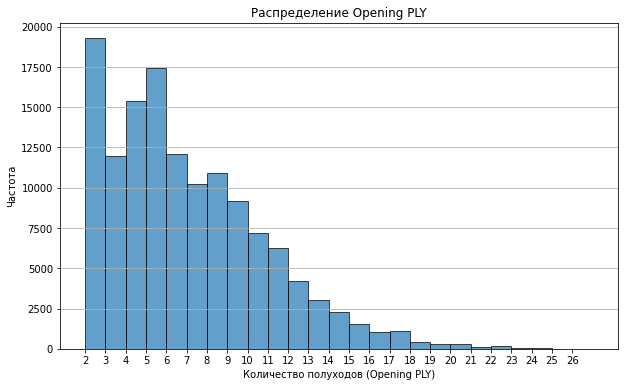

In [27]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(columns_for_eda['Opening_PLY'], bins=range(2, 28), edgecolor='black', alpha=0.7)
plt.title('Распределение Opening PLY')
plt.xlabel('Количество полуходов (Opening PLY)')
plt.ylabel('Частота')
plt.xticks(range(2, 27))
plt.grid(axis='y')
plt.show()

In [28]:
mean_opening_ply = columns_for_eda['Opening_PLY'].mean()

print(f"Среднее значение Opening PLY: {mean_opening_ply:.2f}")

Среднее значение Opening PLY: 6.34


Вывод: в среднем, игроки делают около 6 ходов, следуя известным дебютам, прежде чем начинают играть по своему усмотрению.

В данном столбце наблюдаатся снижение частоты после 6 полуходов. Это может свидетельствовать о том, что большинство игроков предпочитают использовать определенные стратегии в пределах первых шести полуходов, а затем переходят к более сложным маневрам. И можно сказать, что чем выше количество полудов, тем сложнее маневры совершают игроки. Также это может быть связано с тем, что игроки начинают переключаться на более агрессивные или оборонительные стратегии, требующие других актических подходов. И, возможно, это может говорить о том, что игроки в основном стремятся к более быстрым решениям и менее склонны затягивать игру. (Здесь можно проверить с данными о времени игры). При этом важно отметить, что между 3 и 4 полуходами отмечается снижение частоты. Это может говорить о том, на 4 полуходе игроки начинают учитывать действия соперника и переходят от агрессивных самых первых маневров к более осторожным. Начинают осознавать, что некоторые стратегии, с которых начали, могут быть менее эффективными, и на этом этапе вынуждены переосмыслить свою тактику игры, скорректировать свои планы и продумать более сложную стратегию.

5. Анализ столбца White_Player - идентификатор игрока, игравшего белыми - категориальный


In [29]:
columns_for_eda.White_Player.value_counts()

zhigalko_sergei    493
andrey11976        482
dmitrijiiigm       456
tuzakli_egitim     426
littleplotkin      410
                  ... 
platon_kalash        1
remkof               1
cipollino28          1
sweetheart04         1
dy0727               1
Name: White_Player, Length: 24891, dtype: int64

In [30]:
White_Player_counts = columns_for_eda['White_Player'].value_counts()

In [31]:
White_Player_counts

zhigalko_sergei    493
andrey11976        482
dmitrijiiigm       456
tuzakli_egitim     426
littleplotkin      410
                  ... 
platon_kalash        1
remkof               1
cipollino28          1
sweetheart04         1
dy0727               1
Name: White_Player, Length: 24891, dtype: int64

In [ ]:
plt.figure(figsize=(10, 6))
White_Player_counts.plot(kind='barh', color='green')
plt.xlabel('Количество игр')
plt.title('Количество игр для игроков White_Player')
plt.gca().invert_yaxis()  # Инвертируем ось Y
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=White_Player_counts.index, y=White_Player_counts.values, palette='viridis')
plt.title('Количество игр для игроков White_Player')
plt.xlabel('Играющий "Белыми"')
plt.ylabel('Количество игр')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

KeyboardInterrupt: 

Описание: Разброс очков варьируется от 1 до 493. Самый успешный в этом списке игрок набрал 493 очка с ником "zhigalko_sergei". 

6. Анализ столбца White_Title  - шахматный титул игрока, игравшего белыми (например, GM, IM, FM) - категориальный

In [34]:
columns_for_eda.White_Title.value_counts()

other    94079
GM       17689
IM       11676
FM       11509
CM        3108
NM        2463
BOT        165
LM          47
WFM         24
WIM         18
WCM         12
WGM          2
Name: White_Title, dtype: int64

В колонке White_Title представлены  звания игрока, который играет белыми.
otрer - другие, т.е. игроки, не достигшие звания.
GM (Grandmaster) - Гроссмейстер 
IM (International Master) - Международный мастер 
FM (FIDE Master)  - Мастер ФИДЕ
CM (Candidate Master) - Кандидат в мастера
WGM (Woman Grandmaster) - Женщина-гроссмейстер
WIM (Woman International Master) - Женщина - международный мастер
WFM (Woman FIDE Master) - Женщина - мастер ФИДЕ
WCM (Woman Candidate Master) - Женщина-кандидат в мастера


In [36]:
White_Title_counts = columns_for_eda['White_Title'].value_counts()

In [37]:
White_Title_counts

other    94079
GM       17689
IM       11676
FM       11509
CM        3108
NM        2463
BOT        165
LM          47
WFM         24
WIM         18
WCM         12
WGM          2
Name: White_Title, dtype: int64

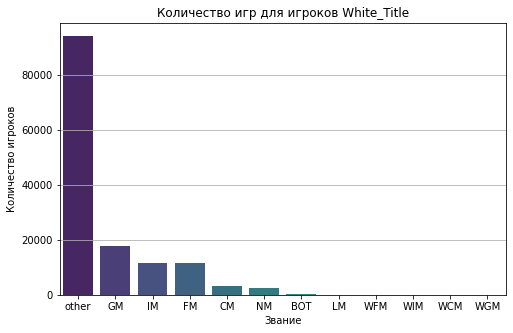

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=White_Title_counts.index, y=White_Title_counts.values, palette='viridis')
plt.title('Количество игр для игроков White_Title')
plt.xlabel('Звание')
plt.ylabel('Количество игроков')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

Вывод.
Как мы видим, к категории "other" относится наибольшее число игроков, 94079 игрока, т.е. большниство шахматистов не являются титулованными. Возможно, это игроки, которые заинтересовались шахматами, решили попробовать себя и свои силы, но не стали продолжать, не так сильно ими увлеклись. 

Титул, который имеют наибольшее количество игроков  - GM - Титул Гроссмейстера, его получили 17689 игроков. Этот титут является самым высоким и престижным званием в шахматах. Это может свидетельствовать о том, что игроки стремятся к получению именно этого звания.

Также, отметим, что Титулов, полученных игроками-женщинами, существенно меньше, количество таких игроков варьируется от 2 до 24. Максимальное количество игроков с Титулом WFM (Женщина - мастер ФИДЕ)  - 24 игрока. Минимальное количество игроков-женщин с Титулом WGM (Женщина-Гроссмейстер) - 2 игрока. Это может говорить о том, что женщины в меньшей степени стремятся к достижению определенного Титула.          

6. Анализ столбца Black_Player  - идентификатор игрока, игравшего черными - категориальный


In [39]:
columns_for_eda.Black_Player.value_counts()

andrey11976         471
zhigalko_sergei     469
dmitrijiiigm        456
ediz_gurel          416
littleplotkin       415
                   ... 
spectral-ai           1
itayakiri             1
olemor                1
amirkhanyan_karo      1
kaptenevans           1
Name: Black_Player, Length: 25227, dtype: int64

Разброс очков варьируется от 1 до 493. Самый успешный в этом списке игрок набрал 493 очка с ником "andrey11976". 

In [42]:
Black_Player_counts = columns_for_eda['Black_Player'].value_counts()
Black_Player_counts

andrey11976         471
zhigalko_sergei     469
dmitrijiiigm        456
ediz_gurel          416
littleplotkin       415
                   ... 
spectral-ai           1
itayakiri             1
olemor                1
amirkhanyan_karo      1
kaptenevans           1
Name: Black_Player, Length: 25227, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=Black_Player_counts.index, y=Black_Player_counts.values, palette='viridis')
plt.title('Количество игр для игроков Black_Player')
plt.xlabel('Играющий "Черными"')
plt.ylabel('Количество игр')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

8. Анализ столбца Black_Title  - шахматный титул игрока, игравшего черными (например, GM, IM, FM) - категориальный

In [43]:
columns_for_eda.Black_Title.value_counts()

other    94280
GM       17787
FM       11677
IM       11364
CM        3023
NM        2512
LM          50
WFM         39
BOT         25
WIM         18
WCM         11
WGM          6
Name: Black_Title, dtype: int64

В колонке Black_Title представлены  звания игрока, который играет белыми.
other - другие, т.е. игроки, не достигшие звания.
GM (Grandmaster) - Гроссмейстер 
IM (International Master) - Международный мастер 
FM (FIDE Master)  - Мастер ФИДЕ
CM (Candidate Master) - Кандидат в мастера
WGM (Woman Grandmaster) - Женщина-гроссмейстер
WIM (Woman International Master) - Женщина - международный мастер
WFM (Woman FIDE Master) - Женщина - мастер ФИДЕ
WCM (Woman Candidate Master) - Женщина-кандидат в мастера


In [44]:
Black_Title_counts = columns_for_eda['Black_Title'].value_counts()

In [45]:
Black_Title_counts

other    94280
GM       17787
FM       11677
IM       11364
CM        3023
NM        2512
LM          50
WFM         39
BOT         25
WIM         18
WCM         11
WGM          6
Name: Black_Title, dtype: int64

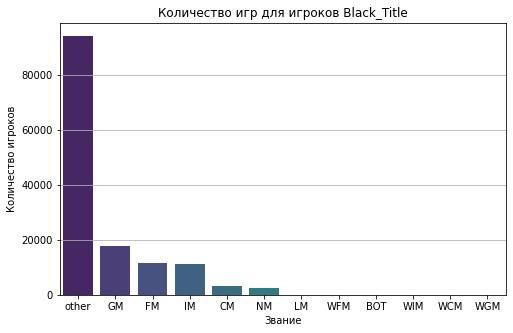

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Black_Title_counts.index, y=Black_Title_counts.values, palette='viridis')
plt.title('Количество игр для игроков Black_Title')
plt.xlabel('Звание')
plt.ylabel('Количество игроков')
plt.xticks(rotation=0)  # Установите угол поворота на 0 для горизонтальных меток
plt.grid(axis='y')  # Включаем сетку по оси Y для лучшей читабельности
plt.show()

Вывод.
Наибольшее количество гроков имеет титул "other"  - 94280 игрока, это количество игроков, не имеющих официальных шахматных титулов.
Среди игроков, наибольшее количество  имеет титул GM -  Гроссмейстер. Это самый высокий титул в шахматах. И далее мы  наблюдаем снижение количества игроков, имеющих титулы, что отражает иерархию титулов в шахматах - от самых высоких к более низким. 
При этом среди игроков-щенщин обладателей титулов значительно меньше. Разброс варьируется от 6 до 39. Среди женщин наибольшее количество являются обладателями титула WFM - Женщина - мастер ФИДЕ -39 игрока, которые достигли определенного мастерства в шахматах. Наменьшее число игроков-женщин, 6 человек, достигли титула WGM - Женщина-гроссмейстер.
Сравнивая данные, полученные  по столбцам Black_Title и  White_Title, где получены данные по количеству игроков-женщин, у количество женщин, играющих "Белыми", достигшие титут  FM - Женщина - мастер ФИДЕ - 24 человека, меньше, по осравнению с количеством женщин, играющих "Черными", - 39 человек. Таким образом, можно предположить, что у женщин, играющих "Черными", больше вероятность получения Титула, нежели при игре "Белыми". 
